Загрузка данных

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

/home/zaur/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [33]:
# Загрузка данных о домах
house_data = pd.read_csv("boston.csv") 

In [34]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [35]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [36]:
house_data.duplicated().sum()

0

In [37]:
house_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [38]:
house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']] = house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].fillna(
    house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].median())

In [39]:
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.479140,8.570832,0.00632,0.083235,0.253715,2.808720,88.9762
ZN,506.0,10.768775,23.025124,0.00000,0.000000,0.000000,0.000000,100.0000
INDUS,506.0,11.028893,6.704679,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.800000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [41]:
# Загрузка данных об ирисах
iris_data = pd.read_csv("Iris.csv") 

In [42]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
iris_data.duplicated().sum()

0

In [45]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [47]:
iris_data.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

In [50]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


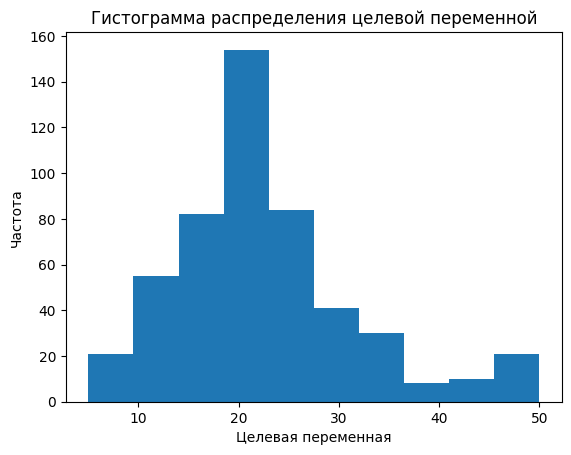

In [77]:
plt.hist(house_data['MEDV'], bins=10)
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Гистограмма распределения целевой переменной')
plt.show();

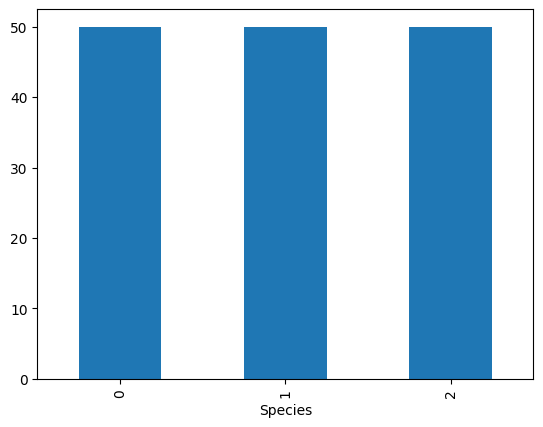

In [76]:
iris_data['Species'].value_counts().plot(kind='bar');

2. Разделение данных на обучающую и тестовую выборки

In [51]:
# Для данных о домах
X_house = house_data.drop("MEDV", axis=1)
y_house = house_data["MEDV"]
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

In [52]:
# Для данных об ирисах
X_iris = iris_data.drop("Species", axis=1)
y_iris = iris_data["Species"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

3. Создание и обучение модели регрессии

In [53]:
# Создание модели линейной регрессии
model_regression = LinearRegression()

In [54]:
# Обучение модели на обучающей выборке
model_regression.fit(X_house_train, y_house_train)

LinearRegression()

4. Оценка качества модели регрессии

In [55]:
# Предсказание на тестовой выборке
y_house_pred = model_regression.predict(X_house_test)

In [60]:
# Вычисление метрик качества
mse = mean_squared_error(y_house_test, y_house_pred)
r2 = r2_score(y_house_test, y_house_pred)

In [61]:
print(f"Среднеквадратическая ошибка: {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратическая ошибка: 25.00
Коэффициент детерминации (R^2): 0.66


Эти данные позволяют сделать следующие выводы:

Среднеквадратическая ошибка (RMSE): 25.00

 RMSE  - это мера того, насколько хорошо модель предсказывает фактические значения. 
 Чем меньше RMSE, тем лучше модель. 
 В данном случае RMSE  равна 25.00, что может быть как хорошим, так и плохим показателем, в зависимости от конкретной задачи и типа данных. 
 Нужно сравнить этот показатель с другими моделями, чтобы определить, насколько хороша эта модель. 

Коэффициент детерминации (R^2): 0.66

 R^2  - это мера того, насколько хорошо модель объясняет изменения в данных. 
 R^2 принимает значения от 0 до 1. Чем ближе R^2 к 1, тем лучше модель объясняет данные.
 В данном случае R^2 равен 0.66, что означает, что модель объясняет 66% изменений в данных. 
 Это хороший показатель, так как  R^2 больше 0.5, что свидетельствует о том, что модель достаточно хорошо объясняет данные.

Вывод:

 Модель достаточно неплохо предсказывает фактические значения, но есть пространство для улучшения. 
 R^2 показывает, что модель хорошо объясняет изменения в данных. 
 Для более точной оценки качества модели необходимо знать конкретную задачу и тип данных. 

Рекомендуемые действия:

 Сравнить эту модель с другими моделями, чтобы оценить ее эффективность.
 Попробовать улучшить модель, например, добавив новые переменные или изменив алгоритм.
 Проанализировать остатки модели, чтобы проверить,  есть ли какие-то систематические ошибки.

5. Создание и обучение модели классификации

In [62]:
# Создание модели k-ближайших соседей
model_classification = KNeighborsClassifier(n_neighbors=3)

In [63]:
# Обучение модели на обучающей выборке
model_classification.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=3)

6. Оценка качества модели классификации

In [64]:
# Предсказание на тестовой выборке
y_iris_pred = model_classification.predict(X_iris_test)

In [65]:
# Вычисление метрик качества
accuracy = accuracy_score(y_iris_test, y_iris_pred)
precision = precision_score(y_iris_test, y_iris_pred, average="macro")
recall = recall_score(y_iris_test, y_iris_pred, average="macro")
f1 = f1_score(y_iris_test, y_iris_pred, average="macro")
confusion_mat = confusion_matrix(y_iris_test, y_iris_pred)

In [66]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 1.00
Точность (Precision): 1.00
Полнота (Recall): 1.00
F1-мера: 1.00
Матрица ошибок:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [79]:
import seaborn as sns

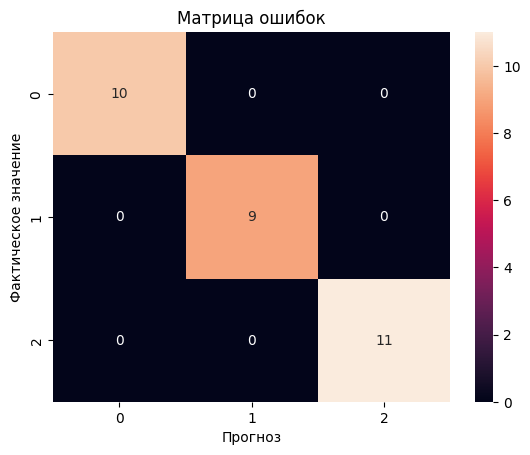

In [80]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Эти данные показывают идеальную производительность модели. 

Объяснение:

 Точность (Precision)  = 1.00 означает, что все предсказанные положительные случаи были действительно положительными. Другими словами, модель не сделала ни одной ложноположительной ошибки.
 Полнота (Recall) = 1.00 означает, что модель нашла все положительные случаи. Другими словами, модель не пропустила ни одного положительного случая.
 F1-мера = 1.00  является гармоническим средним точности и полноты. Поскольку оба показателя равны 1.00, F1-мера также равна 1.00, что подтверждает идеальную производительность модели.

В целом, данные указывают на то, что модель прекрасно справляется с задачей классификации и не делает ошибок.

Однако, важно учитывать контекст:

 Размер выборки: Идеальные показатели могут быть достигнуты на очень маленькой выборке. 
 Сложность задачи: Простые задачи классификации могут быть легко решены даже простыми моделями.
 Сбалансированность данных: Идеальные показатели могут быть достигнуты, если данные сильно сбалансированы (т.е. количество положительных и отрицательных примеров одинаково).

Важно проверить эти показатели на разных выборках данных (например, на тестовой выборке), чтобы убедиться, что модель действительно работает хорошо и не переобучается.